## Diplomski rad - Klasificiranje LEGO kocaka koristeći neuronske mreže

Rad se izvodi koristeći PlaidML za AMD GPU preko Keras-a

In [2]:
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

Promijene vezane za PlaidML se mogu izvesti sa pokretanjem `plaidml-setup` u powershell-u

Sve sljedece linije ce se spominjati na Engleskom jeziku zbog jednostavnosti

In [3]:
import numpy as np
import pandas as pd
import keras
from keras import layers
from matplotlib import pyplot as plt
import cv2

Using plaidml.keras.backend backend.


In [4]:
inputs = keras.Input(shape=(400,400,3), name="test_model")
x = layers.Conv2D(20,3, activation="relu")(inputs)
x = layers.Conv2D(40,3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(20,3, activation="relu")(x)
x = layers.Conv2D(40,3, activation="relu")(x)
outputs = layers.GlobalMaxPooling2D()(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="test_model")
model.summary()

INFO:plaidml:Opening device "opencl_amd_ellesmere.0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
test_model (InputLayer)      (None, 400, 400, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 398, 398, 20)      560       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 396, 396, 40)      7240      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 132, 132, 40)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 130, 130, 20)      7220      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 40)      7240      
_________________________________________________________________
global_max_pooling2d_1 

difficulties in executing the next line may lie in `pydot.py` line 117, which can be commented

"`program += extension`" to "`# program += extension`"

In [5]:
keras.utils.plot_model(model, "oof.png")

models can be saved and loaded via

    model.save("path_to_my_model")
and
    # Recreate the exact same model purely from the file:
    model = keras.models.load_model("path_to_my_model")

Now let's explore some of the data, for starters we will use the following Kaggle dataset: [lego-brick-images](https://www.kaggle.com/joosthazelzet/lego-brick-images)

It's a fairly simple dataset containing renders of some LEGO pieces

In [6]:
os.listdir("../LEGO_brick_images_v1")

['2357 Brick corner 1x2x2',
 '3003 Brick 2x2',
 '3004 Brick 1x2',
 '3005 Brick 1x1',
 '3022 Plate 2x2',
 '3023 Plate 1x2',
 '3024 Plate 1x1',
 '3040 Roof Tile 1x2x45deg',
 '3069 Flat Tile 1x2',
 '3794 Plate 1X2 with 1 Knob']

The first numbers denote the brick model, after that is it's name, size and possible modifications

In [7]:
os.listdir("../LEGO_brick_images_v1/3003 Brick 2x2/")[:10]

['0001.png',
 '0002.png',
 '0003.png',
 '0004.png',
 '0005.png',
 '0006.png',
 '0007.png',
 '0008.png',
 '0009.png',
 '0010.png']

We can see that the folder are filled with individual .png files, these are loadable in Keras.

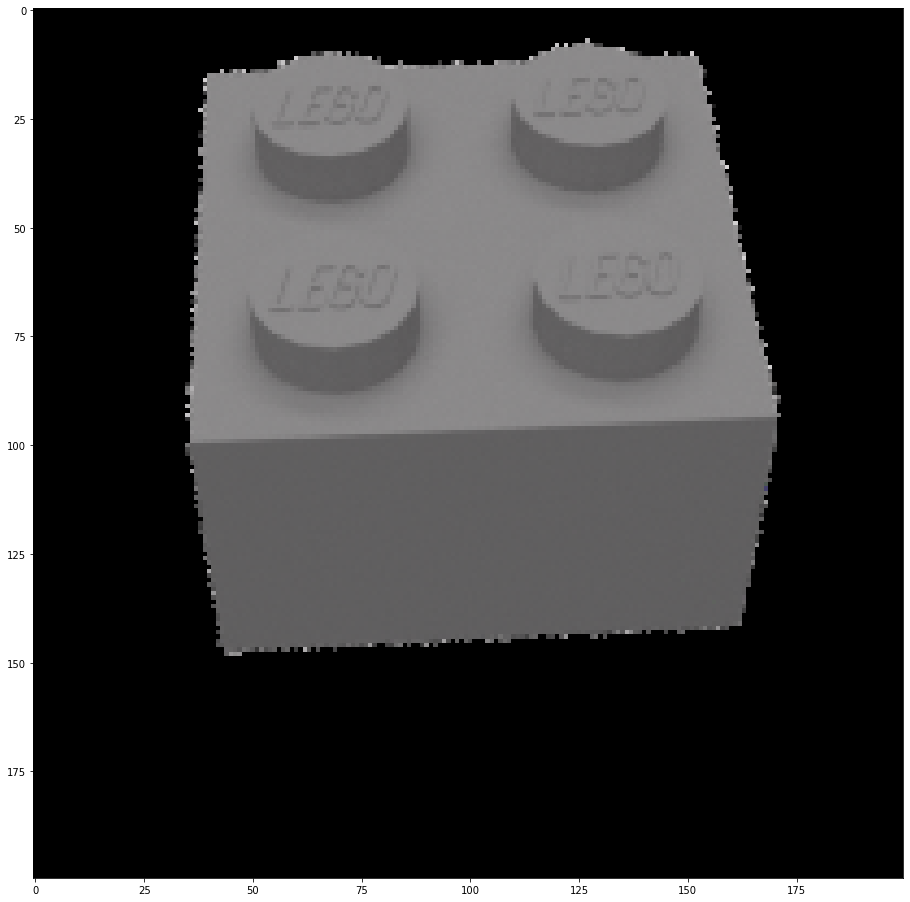

In [8]:
image_path = "../LEGO_brick_images_v1/3003 Brick 2x2/0002.png"
image = cv2.imread(image_path)
plt.figure(figsize=(16,16))
plt.imshow(image)

In [9]:
image.shape

(200, 200, 3)

Try to load the data into Keras

In [11]:
import splitfolders
dataset_path = "../LEGO_brick_images_v1/"
dataset_output = "../output"
splitfolders.ratio(dataset_path, output=dataset_output, seed=1337, ratio=(.7, .3))

os.listdir(dataset_output)

Copying files: 3979 files [00:34, 115.94 files/s]


['train', 'val']

In [15]:
train_data_generation = keras.preprocessing.image.ImageDataGenerator()

train_generator = train_data_generation.flow_from_directory(os.path.join(dataset_output,'train'), target_size=(200,200), shuffle=True)

validation_generator = train_data_generation.flow_from_directory(os.path.join(dataset_output, 'val'), target_size=(200,200), shuffle=True)

Found 2785 images belonging to 10 classes.
Found 1194 images belonging to 10 classes.


In [ ]:
# todo stuff